In [181]:
# import subset

import pandas as pd
import re
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
from PIL import features
import sqlite3

In [182]:
# membaca data dari file csv

data = pd.read_csv("D:/Binar/Challenge/BinarChallenge1/AssetChallenge/data.csv", encoding='latin-1')

df_abusive = pd.read_csv("D:/Binar/Challenge/BinarChallenge1/AssetChallenge/abusive.csv")
df_kbbi = pd.read_csv("D:/Binar/Challenge/BinarChallenge1/AssetChallenge/new_kamusalay.csv", encoding='latin-1', names=['TIDAKBAKU', 'BAKU'])


In [183]:
data.head()

,Tweet,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong
0,- disaat semua cowok berusaha melacak perhatia...,1,1,1,0,0,0,0,0,1,1,0,0
1,RT USER: USER siapa yang telat ngasih tau elu?...,0,1,0,0,0,0,0,0,0,0,0,0
2,"41. Kadang aku berfikir, kenapa aku tetap perc...",0,0,0,0,0,0,0,0,0,0,0,0
3,USER USER AKU ITU AKU\n\nKU TAU MATAMU SIPIT T...,0,0,0,0,0,0,0,0,0,0,0,0
4,USER USER Kaum cebong kapir udah keliatan dong...,1,1,0,1,1,0,0,0,0,0,1,0


In [184]:
# cleaning data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13169 entries, 0 to 13168
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Tweet          13169 non-null  object
 1   HS             13169 non-null  int64 
 2   Abusive        13169 non-null  int64 
 3   HS_Individual  13169 non-null  int64 
 4   HS_Group       13169 non-null  int64 
 5   HS_Religion    13169 non-null  int64 
 6   HS_Race        13169 non-null  int64 
 7   HS_Physical    13169 non-null  int64 
 8   HS_Gender      13169 non-null  int64 
 9   HS_Other       13169 non-null  int64 
 10  HS_Weak        13169 non-null  int64 
 11  HS_Moderate    13169 non-null  int64 
 12  HS_Strong      13169 non-null  int64 
dtypes: int64(12), object(1)
memory usage: 1.3+ MB


In [185]:
data.duplicated().sum()

125

In [186]:
data = data.drop_duplicates(subset='Tweet', keep='first').reset_index()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13023 entries, 0 to 13022
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   index          13023 non-null  int64 
 1   Tweet          13023 non-null  object
 2   HS             13023 non-null  int64 
 3   Abusive        13023 non-null  int64 
 4   HS_Individual  13023 non-null  int64 
 5   HS_Group       13023 non-null  int64 
 6   HS_Religion    13023 non-null  int64 
 7   HS_Race        13023 non-null  int64 
 8   HS_Physical    13023 non-null  int64 
 9   HS_Gender      13023 non-null  int64 
 10  HS_Other       13023 non-null  int64 
 11  HS_Weak        13023 non-null  int64 
 12  HS_Moderate    13023 non-null  int64 
 13  HS_Strong      13023 non-null  int64 
dtypes: int64(13), object(1)
memory usage: 1.4+ MB


In [187]:
data.duplicated().sum()

0

In [188]:
# melihat persentase pola kata kasar vs non kata kasar

def kategoriumum(x):
    if x['HS'] == 1 and x['Abusive'] == 1:
        return 'Mengandung kata kasar'
    elif x['HS'] == 1 and x['Abusive'] == 0:
        return 'Mengandung kata kasar'
    elif x['HS'] == 0 and x['Abusive'] == 1:
        return 'Mengandung kata kasar'
    else:
        return 'Tidak mengandung kata kasar'

data['Kategori_umum'] = data.apply(kategoriumum, axis=1)

In [189]:
data['Kategori_umum'].value_counts()

Mengandung kata kasar          7243
Tidak mengandung kata kasar    5780
Name: Kategori_umum, dtype: int64

<Axes: xlabel='Kategori_umum', ylabel='count'>

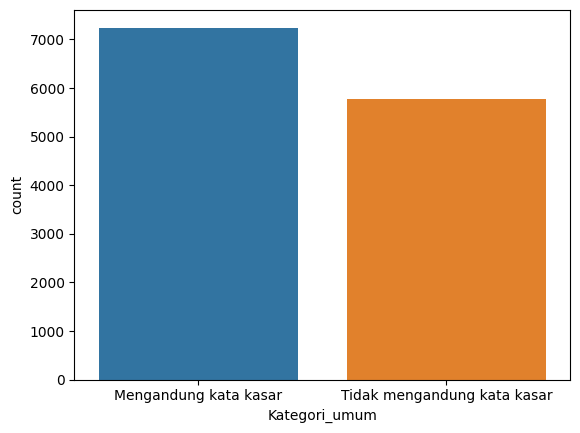

In [190]:
sns.countplot(x=data['Kategori_umum'])

<Axes: ylabel='Kategori_umum'>

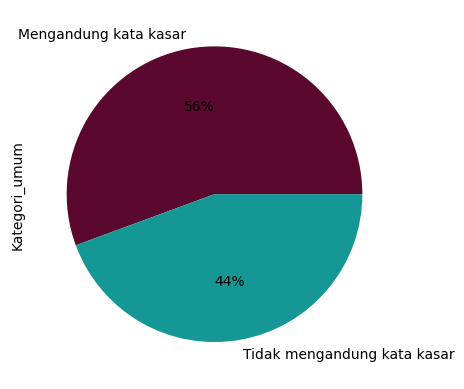

In [191]:
data['Kategori_umum'].value_counts().plot.pie(autopct='%1.0f%%', colors = ['#5A082D','#159895'])

In [192]:
# melihat persentase pola kata kasar

def kategori(x):
    if x['HS'] == 1 and x['Abusive'] == 1:
        return 'Hate speech & abusive'
    elif x['HS'] == 1 and x['Abusive'] == 0:
        return 'Hate speech'
    elif x['HS'] == 0 and x['Abusive'] == 1:
        return 'Abusive'
    else:
        return 'None'

data['Kategori'] = data.apply(kategori, axis=1)

In [193]:
data['Kategori'].value_counts()

None                     5780
Hate speech & abusive    3250
Hate speech              2251
Abusive                  1742
Name: Kategori, dtype: int64

In [194]:
# cleaning none pada kolom kategori

filter = data['Kategori'] == 'None'
data[~filter]['Kategori'].value_counts()

Hate speech & abusive    3250
Hate speech              2251
Abusive                  1742
Name: Kategori, dtype: int64

<Axes: ylabel='Kategori'>

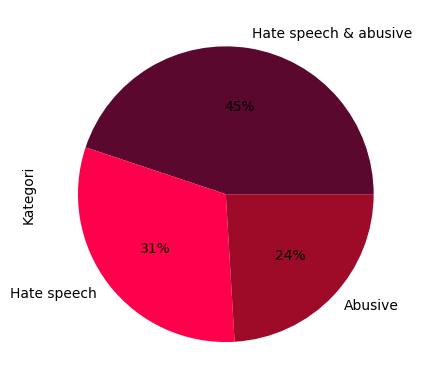

In [195]:
# visualisasi data target sasaran kata-kata kasar
data[~filter]['Kategori'].value_counts().plot.pie(autopct='%1.0f%%', colors = ['#5A082D','#FF004D','#9D0B28'])

In [196]:
#contoh case tweet yang mengandung hate speech dan abusive
print(data[(data['HS'] == 1) & (data['Abusive']==1)]['Tweet'][:10])

0     - disaat semua cowok berusaha melacak perhatia...
4     USER USER Kaum cebong kapir udah keliatan dong...
5     USER Ya bani taplak dkk \xf0\x9f\x98\x84\xf0\x...
10    Setidaknya gw punya jari tengah buat lu, sebel...
11    USER USER USER USER BANCI KALENG MALU GA BISA ...
14    USER Bu guru enakan jadi jablay atau guru esde...
15    USER USER USER USER USER USER Lawan bicara gw ...
18    Jadi cowo itu harus Gantle kalo ga Gantle itu ...
26           Ini si USER kerjaannya delay mulu! Setan!'
29    USER USER Itu mah sdh nenek-nenek sy heran sam...
Name: Tweet, dtype: object


In [197]:
print(data[(data['HS'] == 1) & (data['Abusive']==1)]['Tweet'][4])

USER USER Kaum cebong kapir udah keliatan dongoknya dari awal tambah dongok lagi hahahah'


In [198]:
#contoh case tweet yang mengandung hate speech 
print(data[(data['HS'] == 1) & (data['Abusive']==0)]['Tweet'][:20])

13     Aktor huruhara 98 Prabowo S ingin lengserkan p...
28     RT USER USER USER PKI hanya muncul jika jelang...
30     USER USER USER USER USER USER USER USER USER I...
52         pinokio umur 3 taonan tuh. #2019GantiPresiden
54                   RT USER benci sekali dgn Umat Islam
76     tapi masih menikmati kebijakan yang dulu diusu...
77     Kalo seumpama orang cina di usir paksa dari in...
81                          PROYEK KORUPSI REZIM SBY URL
84     USER USER Terus menurut lo kitab suci agAma ap...
95     Jgn salah target bkn ahok... agenda utama leng...
96     USER USER masa baru kena hestek aja udah kepan...
100    Prabowo Sudah Kalah Menyebut Bantuan Jokowi Ha...
105    Padahal gubernur saat ini Djarot. Mayoritas pa...
119    Pendaftaran Capres untuk #Pilpres2019 saja bel...
122                Cina perusak bangsa!! Usir !! Stuju??
133    Moga ini ada tindak lanjutnya!; ; Pelaporan te...
135    USER USER USER .\nOnta mati klo kebanyakan Minum'
136    URL Ahok tng mrka trus w

In [199]:
print(data[(data['HS'] == 1) & (data['Abusive']==0)]['Tweet'][12979])

USER selamat datang rezim Komunis Anti Islam


In [200]:
#contoh case tweet yang mengandung abusive
print(data[(data['HS'] == 0) & (data['Abusive']==1)]['Tweet'][:10])

1     RT USER: USER siapa yang telat ngasih tau elu?...
7     Gue baru aja kelar re-watch Aldnoah Zero!!! pa...
9                         USER Enak lg klo smbil ngewe'
17    Ari sarua beki mah repeh monyet\xf0\x9f\x98\x8...
20    Asw ya tapi gua jarang ngambek, tacut wkkwkwkw...
33    RT USER: Kelakuan homok jaman now, ngentot aja...
36    \xe2\x80\x9dPara Bajingan yang telah melukai L...
39                       Edan emang goollnya fabiano!!'
56                             USER dari pada gua nete'
78                              USER bunda ngentot yuk'
Name: Tweet, dtype: object


In [201]:
print(data[(data['HS'] == 0) & (data['Abusive']==1)]['Tweet'][36])

\xe2\x80\x9dPara Bajingan yang telah melukai Lady harus menerima ganjaran seratus kali lipat!!\xe2\x80\x9d(sanji) ##HBD17thPelautJKT48'


In [202]:
# melihat persentase target kata kasar

def target(x):
    if x['HS_Individual'] == 1 and x['HS_Group'] == 0:
        return 'Individu'
    elif x['HS_Individual'] == 0 and x['HS_Group'] == 1:
        return 'Kelompok'
    else:
        return 'None'
        
data['Target'] = data.apply(target, axis=1)

In [203]:
data['Target'].value_counts()

None        7522
Individu    3528
Kelompok    1973
Name: Target, dtype: int64

In [204]:
# cleaning none pada kolom target
filter = data['Target'] == 'None'
data[~filter]['Target'].value_counts()

Individu    3528
Kelompok    1973
Name: Target, dtype: int64

<Axes: ylabel='Target'>

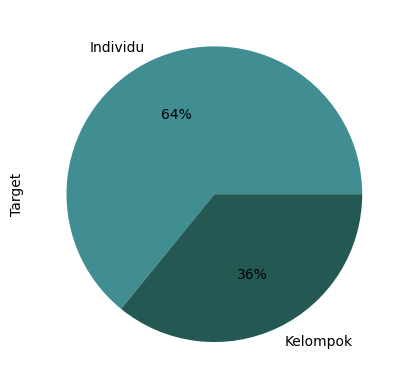

In [205]:
# visualisasi data target sasaran kata-kata kasar
data[~filter]['Target'].value_counts().plot.pie(autopct='%1.0f%%', colors = ['#408E91','#245953'])

In [206]:
df_abusive.head()

,ABUSIVE
0,alay
1,ampas
2,buta
3,keparat
4,anjing


In [207]:
df_abusive.describe()

,ABUSIVE
count,125
unique,125
top,alay
freq,1


In [208]:
# visualisasi kata-kata kasar dengan wordcloud

""""
from wordcloud import WordCloud

def createwc(text):
  wc = WordCloud(width=800, height=800, background_color='white').generate(text)
  return wc

  plt.figure(figsize=(8,8))
  plt.imshow(createwc)
  plt.axis('off')
  plt.show()

"""

'"\nfrom wordcloud import WordCloud\n\ndef createwc(text):\n  wc = WordCloud(width=800, height=800, background_color=\'white\').generate(text)\n  return wc\n\n  plt.figure(figsize=(8,8))\n  plt.imshow(createwc)\n  plt.axis(\'off\')\n  plt.show()\n\n'

In [209]:
""""

createwc(' '.join(df_abusive['ABUSIVE'].tolist()))

note: wordcloud tidak dapat bekerja karena ada komponen di PC yang tidak compatible
"""

'"\n\ncreatewc(\' \'.join(df_abusive[\'ABUSIVE\'].tolist()))\n\nnote: wordcloud tidak dapat bekerja karena ada komponen di PC yang tidak compatible\n'

Note perbaikan: abusive di remove, bukan di replace
1) buat fungsi censor(remove)
2) perbaiki for abusivearr in abusiveword: bisa liat di recording atau di repository ku folder Code request 

In [210]:
# cleaning untuk save data.csv ke SQL

def lowercase(text):
    return text.lower()

def removechars(text):
    text = re.sub('\n',' ',text) 
    text = re.sub('rt',' ',text) 
    text = re.sub('user',' ',text) 
    text = re.sub('((www\.[^\s]+)|(https?://[^\s]+)|(http?://[^\s]+))',' ',text)
    text = re.sub('  +', ' ', text)  
    return text
    
def removenothers(text):
    text = re.sub('[^0-9a-zA-Z~*]+', ' ', text) 
    return text

def cleaning(text):
    text = lowercase(text)
    text = removechars(text)
    text = removenothers(text)
    return text

In [211]:
# fungsi untuk menyensor kata kasar

def censor(text):
    abusiveword = df_abusive['ABUSIVE'].tolist()
    for word in abusiveword:
        pattern = re.compile(r'\b{}\b'.format(word))
        length = len(word)
        replacement = '*' * length
        text = pattern.sub(replacement, text.lower())
    return text

In [225]:
print(cleaning(censor("bunga, bajingan, babi, anak #$%haram?")))

bunga ******** **** anak haram 


In [213]:
df_kbbi.head()

,TIDAKBAKU,BAKU
0,anakjakartaasikasik,anak jakarta asyik asyik
1,pakcikdahtua,pak cik sudah tua
2,pakcikmudalagi,pak cik muda lagi
3,t3tapjokowi,tetap jokowi
4,3x,tiga kali


In [214]:
df_kbbi.describe()

,TIDAKBAKU,BAKU
count,15167,15167
unique,15167,8639
top,anakjakartaasikasik,wkwk
freq,1,100


In [220]:
# buat fungsi untuk mereplace kalimat non baku menjadi baku

def changealay(txt):
    alay = dict(zip(df_kbbi['TIDAKBAKU'], df_kbbi['BAKU']))
    txt = ' '.join([alay[word] if word in alay else word for word in txt.split(' ')])
    return txt


# repsentence = []
# repsentence = re.sub(df_kbbi['TIDAKBAKU']: ['BAKU'] for data['Tweet'] in data)
# print(repsentence[])

In [224]:
print(changealay("anakjakartaasikasik"))

anak jakarta asyik asyik


In [36]:
# cleaning untuk save data.csv ke SQL

def lowercase(text):
    return text.lower()

def removechars(text):
    text = re.sub('\n',' ',text) 
    text = re.sub('rt',' ',text) 
    text = re.sub('user',' ',text) 
    text = re.sub('((www\.[^\s]+)|(https?://[^\s]+)|(http?://[^\s]+))',' ',text) 
    text = re.sub('  +', ' ', text) 
    return text
    
def removenothers(text):
    text = re.sub('[^0-9a-zA-Z]+', ' ', text) 
    return text

def cleaning(text):
    text = lowercase(text)
    text = removechars(text)
    text = removenothers(text)
    return text


In [37]:
# apply cleaning pada kolom Tweet
data['Tweet'] = data['Tweet'].apply(cleaning)

In [38]:
# save data csv ke format sql

conn = sqlite3.connect('D:/Binar/Challenge/BinarChallenge1/AssetChallenge/datacsv_tosql.db')
data.to_sql('Datanew', conn, if_exists='replace', index=False)

conn.close()

#### Good lanjutkan code nya, kalau ada update di push ke github ya biar bisa di cek

In [39]:
from flasgger import Swagger, LazyString, LazyJSONEncoder